In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils

In [0]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(np.append(x_train.shape, 1))
x_test = x_test.reshape(np.append(x_test.shape, 1))
encode_y_train = np_utils.to_categorical(y_train)
encode_y_test = np_utils.to_categorical(y_test)

input_shape = (28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(x_train, encode_y_train, batch_size=128, epochs=4)

Epoch 1/4
26880/60000 [============>.................] - ETA: 2:52 - loss: 2.4740 - acc: 0.7766

KeyboardInterrupt: ignored

In [0]:
model.evaluate(x_test, encode_y_test)

In [0]:
predicted_classes = model.predict_classes(x_test)

Predicted 7, Actual 7


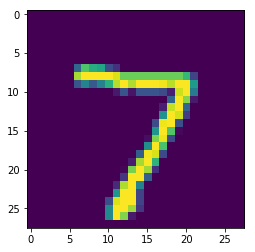

In [0]:
index = 0
plt.imshow(x_test[index].reshape(28, 28))
print('Predicted {}, Actual {}'.format(
    predicted_classes[index], y_test[index]))